<a href="https://colab.research.google.com/github/garfield-gray/NeuralNetwork/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

import sklearn as sl
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
d = datasets.load_breast_cancer()
x = d.data
y = d.target

In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('Shape of the training set:'+" "+str(x_train.shape))
print('Size of the training set:'+" "+str(x_train.shape[0]))

print('Shape of the testing set:'+" "+str(x_test.shape))
print('Size of the testing set:'+" "+str(x_test.shape[0]))

Shape of the training set: (455, 30)
Size of the training set: 455
Shape of the testing set: (114, 30)
Size of the testing set: 114


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32 ,activation='relu',input_shape=(30,)),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train ,epochs=100,batch_size=32 )

Epoch 1/100
15/15 [==============================] - 1s 2ms/step - loss: 13.6436 - accuracy: 0.4264
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 2.3451 - accuracy: 0.5846
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.8132
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8989
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3659 - accuracy: 0.8813
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8989
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9033
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.9077
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.8923
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9121
Epoch 11

In [17]:
y_pred_float = model.predict_step(x_test)  
y_pred = np.round(y_pred_float)

In [18]:
target_list=['benign','malignant']
sl.metrics.classification_report(y_true=y_test,y_pred=y_pred,output_dict = True,target_names=target_list)

{'accuracy': 0.9035087719298246,
 'benign': {'f1-score': 0.8674698795180723,
  'precision': 1.0,
  'recall': 0.7659574468085106,
  'support': 47},
 'macro avg': {'f1-score': 0.8958039052762775,
  'precision': 0.9294871794871795,
  'recall': 0.8829787234042553,
  'support': 114},
 'malignant': {'f1-score': 0.9241379310344827,
  'precision': 0.8589743589743589,
  'recall': 1.0,
  'support': 67},
 'weighted avg': {'f1-score': 0.9007747869882433,
  'precision': 0.9171165092217723,
  'recall': 0.9035087719298246,
  'support': 114}}

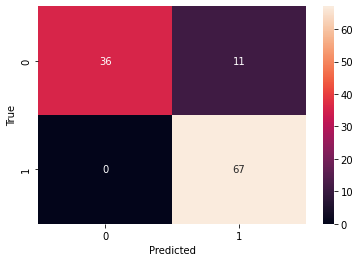

In [19]:
CM = sl.metrics.confusion_matrix(y_true=y_test,y_pred=y_pred)
sb.heatmap(CM,annot=True )
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()